In [1]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read data

df = pd.read_csv(r"F:\DataScience Python\Machine Learning\Models\UnSupervised Learning\K-means Clustering\Material\MallCustomers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Explore the data

df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Check for missing values

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [49]:
X= df.iloc[:, [3,4]].values

In [51]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(2,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters


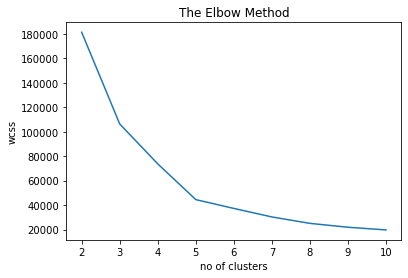

In [53]:
#Visualizing the ELBOW method to get the optimal value of K 

plt.plot(range(2,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [67]:
# Model Build
kmeansmodel = KMeans(n_clusters= 6, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

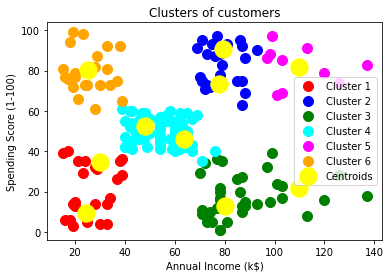

In [68]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [69]:

from sklearn.metrics import silhouette_score

n_clusters = [4,5,6,7,8,10]
# init['k-means++', 'random', 'ndarray', 'callable']


for i in n_clusters:
    cluster = KMeans(n_clusters = i, init='random', random_state = 0)
    predict = cluster.fit_predict(X)
    
    score = silhouette_score(X, predict, random_state = 0)
    print(f'for n_clusters {i}, silhouette score is {score}')

for n_clusters 4, silhouette score is 0.4931963109249047
for n_clusters 5, silhouette score is 0.553931997444648
for n_clusters 6, silhouette score is 0.5379675585622219
for n_clusters 7, silhouette score is 0.45462869756741453
for n_clusters 8, silhouette score is 0.45732611752686836
for n_clusters 10, silhouette score is 0.4267876926898719


In [70]:
# form a dataframe containing cluster centers
# 'cluster_centers_' returns the co-ordinates of a cluster center 

centers = pd.DataFrame(kmeansmodel.cluster_centers_, columns=  X.columns[:2]) 
centers.head()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [36]:
# sort the variables based on cluster centers
cluster_1 = sorted(zip(list(centers.iloc[0,:]), list(centers.columns)), reverse = True)[:10]     

In [40]:
# size of a cluster_1
np.unique(kmeansmodel.labels_, return_counts=True)[1][0]

81

In [41]:
# retrieve the top 10 variables present in the cluster
cluster1_var = pd.DataFrame(cluster_1)[1]
cluster1_var

0        Annual Income (k$)
1    Spending Score (1-100)
Name: 1, dtype: object

In [65]:
# get summary for observations in the cluster
# consider the number of orders and customer gender for cluster analysis
# X[['Gender']][X.Cluster == 0].describe()

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39], dtype=int64)